In [72]:
import pandas as pd
data = pd.read_csv('data.csv')
data = data.drop(columns = ['index'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [74]:
# Check number of unique values
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [75]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [76]:
from tabulate import tabulate

# Pretty print adjusted bad debt
print('Adjusted bad debt:')
print(tabulate(data.query('UnitPrice < 0'), headers='keys', tablefmt='grid'))

# Pretty print refund datasets
print('\nRefund datasets:')
print(tabulate(data.query('Quantity < 0').head(), headers='keys', tablefmt='grid'))

# Adjust for the bad debt columns
data = data.query('UnitPrice >= 0')


Adjusted bad debt:
+--------+-------------+-------------+-----------------+------------+-----------------+-------------+--------------+----------------+
|        | InvoiceNo   | StockCode   | Description     |   Quantity | InvoiceDate     |   UnitPrice |   CustomerID | Country        |
+========+=============+=============+=================+============+=================+=============+==============+================+
| 299983 | A563186     | B           | Adjust bad debt |          1 | 8/12/2011 14:51 |    -11062.1 |          nan | United Kingdom |
+--------+-------------+-------------+-----------------+------------+-----------------+-------------+--------------+----------------+
| 299984 | A563187     | B           | Adjust bad debt |          1 | 8/12/2011 14:52 |    -11062.1 |          nan | United Kingdom |
+--------+-------------+-------------+-----------------+------------+-----------------+-------------+--------------+----------------+

Refund datasets:
+-----+-------------+----

In [79]:
# Weird stock codes 
adjusts = data[data.StockCode.apply(lambda x: len(x) < 3)].StockCode.unique()
print('Unclear what these codes are')
print(adjusts)

data[data.StockCode.isin(adjusts)][['Description', 'StockCode']].drop_duplicates()

Unclear what these codes are
['D' 'C2' 'M' 'S' 'm' 'B']


,Description,StockCode
141,Discount,D
1423,CARRIAGE,C2
2239,Manual,M
14436,SAMPLES,S
40383,Manual,m
299982,Adjust bad debt,B
453999,NaN,C2


In [84]:
# what is carriage
data.query('StockCode == "C2"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,12/6/2010 12:40,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,12/6/2010 13:06,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,12/9/2010 11:30,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,12/9/2010 11:48,50.0,14932.0,Channel Islands
...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,11/30/2011 15:08,50.0,14911.0,EIRE
516484,579910,C2,CARRIAGE,1,12/1/2011 8:52,50.0,14911.0,EIRE
518854,580124,C2,CARRIAGE,1,12/1/2011 17:12,50.0,NaN,EIRE
518905,580127,C2,CARRIAGE,1,12/1/2011 17:51,50.0,14911.0,EIRE


In [86]:
data.query('InvoiceNo == "580124"') #likely some type of tariff or shipping cost?

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
518841,580124,23176,ABC TREASURE BOOK BOX,16,12/1/2011 17:12,2.25,NaN,EIRE
518842,580124,22138,BAKING SET 9 PIECE RETROSPOT,3,12/1/2011 17:12,4.95,NaN,EIRE
518843,580124,22139,RETROSPOT TEA SET CERAMIC 11 PC,9,12/1/2011 17:12,4.95,NaN,EIRE
518844,580124,22617,BAKING SET SPACEBOY DESIGN,3,12/1/2011 17:12,4.95,NaN,EIRE
518845,580124,23080,RED METAL BOX TOP SECRET,2,12/1/2011 17:12,8.25,NaN,EIRE
518846,580124,22379,RECYCLING BAG RETROSPOT,10,12/1/2011 17:12,2.10,NaN,EIRE
518847,580124,20712,JUMBO BAG WOODLAND ANIMALS,10,12/1/2011 17:12,2.08,NaN,EIRE
518848,580124,35471D,SET OF 3 BIRD LIGHT PINK FEATHER,24,12/1/2011 17:12,0.39,NaN,EIRE
518849,580124,22153,ANGEL DECORATION STARS ON DRESS,48,12/1/2011 17:12,0.42,NaN,EIRE
518850,580124,23212,HEART WREATH DECORATION WITH BELL,12,12/1/2011 17:12,1.25,NaN,EIRE


In [87]:
data = data[~data.StockCode.isin(adjusts)]

In [102]:
# Needed transformations
data['Revenue'] = data.Quantity * data.UnitPrice
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
max_invoice_date = data.InvoiceDate.max() # Serves as 'current date' for this analysis


# At customer level determine key metrics:
customer_rev = data.groupby('CustomerID').Revenue.sum() # nets out refunds
customer_total_quantity = data.groupby('CustomerID').Quantity.sum() # nets out refunds
total_num_orders = data.groupby('CustomerID').InvoiceNo.nunique()

# Refund Analysis total orders as primary key
num_refunds = data.query('Quantity < 0').groupby('CustomerID').Quantity.count().reindex(total_num_orders.index).fillna(0)
latest_refund = data.query('Quantity < 0').groupby('CustomerID').InvoiceDate.max().reindex(total_num_orders.index).fillna(pd.NaT)
refunded_amount = data.query('Quantity < 0').groupby('CustomerID').Revenue.sum().reindex(total_num_orders.index).fillna(0).abs()
time_since_latest_refund = (max_invoice_date - latest_refund).dt.days

# Per Order breakdown
customer_num_orders = total_num_orders - num_of_refunds_full # Removed refunds
customer_rev_per_order = customer_rev / customer_num_orders
customer_qty_per_order = customer_total_quantity / customer_num_orders

# Num Iteams and date transforms; Exclude refunds from the latest order data
customer_num_unique_items_bought = data.query('Quantity > 0').groupby('CustomerID').StockCode.nunique()
customer_max_date = data.query('Quantity > 0').groupby('CustomerID').InvoiceDate.max()
customer_min_date = data.query('Quantity > 0').groupby('CustomerID').InvoiceDate.min()
customer_relationship_length = (customer_max_date - customer_min_date).dt.days
customer_time_since_last_order = (max_invoice_date - customer_max_date).dt.days

# Average time between orders
data_sorted = data.query('Quantity > 0').sort_values(by=['CustomerID', 'InvoiceDate']) # exclude refunds
data_sorted['time_between_orders'] = data_sorted.groupby('CustomerID')['InvoiceDate'].diff().dt.days
average_time_between_orders = data_sorted.groupby('CustomerID')['time_between_orders'].mean()

cols = [
    customer_rev,
    customer_total_quantity,
    customer_num_orders, 
    customer_rev_per_order,
    customer_qty_per_order,
    customer_num_unique_items_bought,
    customer_relationship_length,
    customer_time_since_last_order,
    average_time_between_orders, 
    num_refunds,
    refunded_amount,
    time_since_latest_refund
]
customer_data = pd.concat(cols,axis=1)

column_names = [
    'total_net_rev',                        
    'total_net_quantity',                   
    'num_orders',                       
    'avg_rev_per_order',                    
    'avg_qty_per_order',                    
    'num_unique_items_bought',                                
    'relationship_length_days',         
    'time_since_last_order_days',       
    'average_time_between_orders_days', 
    'num_refunds',
    'refunded_amount', 
    'time_since_latest_refund'
]

customer_data.columns = column_names
customer_data.head()


C:\Users\ppara\AppData\Local\Temp\ipykernel_21460\799043970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data.Quantity * data.UnitPrice
C:\Users\ppara\AppData\Local\Temp\ipykernel_21460\799043970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


,total_net_rev,total_net_quantity,num_orders,avg_rev_per_order,avg_qty_per_order,num_unique_items_bought,relationship_length_days,time_since_last_order_days,average_time_between_orders_days,num_refunds,refunded_amount,time_since_latest_refund
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.0,1.0,0.000000,0.000000,1.0,0.0,325.0,NaN,1.0,77183.6,325.0
12347.0,4310.00,2458.0,7.0,615.714286,351.142857,103.0,365.0,1.0,2.0,0.0,0.0,NaN
12348.0,1797.24,2341.0,4.0,449.310000,585.250000,22.0,282.0,74.0,9.4,0.0,0.0,NaN
12349.0,1757.55,631.0,1.0,1757.550000,631.000000,73.0,0.0,18.0,0.0,0.0,0.0,NaN
12350.0,334.40,197.0,1.0,334.400000,197.000000,17.0,0.0,309.0,0.0,0.0,0.0,NaN


In [103]:
import numpy as np
customer_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [127]:
# Set 'relationship_length_days' and 'average_time_between_orders_days' to null when 'num_orders' is 1
customer_data.loc[customer_data['num_orders'] == 1, ['relationship_length_days', 'average_time_between_orders_days']] = pd.NA

# Set 'relationship_length_days' and 'average_time_between_orders_days' to null when 'num_orders' is 1
customer_data.loc[customer_data['num_orders'] == 1, ['relationship_length_days', 'average_time_between_orders_days']] = pd.NA

# Change 'average_time_between_orders_days' to NA when it's 'same'
customer_data.loc[customer_data['average_time_between_orders_days'] == 'same', 'average_time_between_orders_days'] = pd.NA

# If 'average_time_between_orders_days' is not already numeric, convert it
customer_data['average_time_between_orders_days'] = pd.to_numeric(customer_data['average_time_between_orders_days'], errors='coerce')

In [128]:
# Eliminate negatives - could be error, but small
customer_data = customer_data.query('num_orders > 0')
customer_data = customer_data.query('total_net_rev > 0')
customer_data.describe()

,total_net_rev,total_net_quantity,num_orders,avg_rev_per_order,avg_qty_per_order,num_unique_items_bought,relationship_length_days,time_since_last_order_days,average_time_between_orders_days,num_refunds,refunded_amount,time_since_latest_refund
count,4.314000e+03,4314.000000,4314.000000,4.314000e+03,4314.000000,4314.000000,2824.000000,4314.000000,2824.000000,4314.000000,4314.000000,1510.000000
mean,1.936225e+03,1133.136996,4.236903,3.787942e+02,228.494928,61.666667,199.507790,91.170839,4.780350,1.966389,95.018338,130.060265
std,8.323856e+03,4701.723589,7.535370,5.250981e+02,319.112651,85.405497,113.834919,99.854310,12.337550,7.239536,2629.629516,109.248992
min,1.776357e-15,0.000000,1.000000,1.776357e-15,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.021425e+02,159.000000,1.000000,1.752175e+02,92.128788,16.000000,99.000000,17.000000,1.106398,0.000000,0.000000,34.000000
50%,6.578500e+02,373.000000,2.000000,2.860400e+02,160.000000,35.500000,208.000000,50.000000,2.167840,0.000000,0.000000,97.000000
75%,1.625740e+03,978.000000,5.000000,4.254438e+02,270.000000,78.000000,300.000000,140.000000,4.392602,1.000000,15.000000,205.000000
max,2.798010e+05,197200.000000,204.000000,1.980975e+04,7824.000000,1785.000000,373.000000,373.000000,309.000000,222.000000,168469.600000,373.000000


<Axes: >

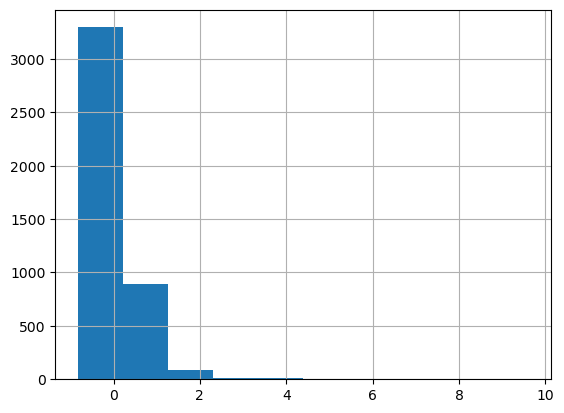

In [129]:
customer_data_core = customer_data.drop(columns = ['refunded_amount', 'time_since_latest_refund']) # Too much noise/NaNs

# leverage Z-scores to standardize "engagement score"
z_scores = (customer_data_core - customer_data_core.mean()) / customer_data_core.std()

engagement_cols = ['num_orders', 
                   'avg_rev_per_order', 
                   'avg_qty_per_order', 
                   'relationship_length_days', 
                   'num_unique_items_bought']
engagement_score = z_scores[engagement_cols].mean(axis=1)
engagement_score.hist()                  

In [130]:
# Certain scores need to be inverted because theyt indicate lower engagement
customer_data_core['engagement_score'] = engagement_score
customer_data_core.head()

,total_net_rev,total_net_quantity,num_orders,avg_rev_per_order,avg_qty_per_order,num_unique_items_bought,relationship_length_days,time_since_last_order_days,average_time_between_orders_days,num_refunds,engagement_score
CustomerID,,,,,,,,,,,
12347.0,4310.00,2458.0,7.0,615.714286,351.142857,103.0,365.0,1.0,2.000000,0.0,0.627995
12348.0,1797.24,2341.0,4.0,449.310000,585.250000,22.0,282.0,74.0,9.400000,0.0,0.296205
12349.0,1757.55,631.0,1.0,1757.550000,631.000000,73.0,NaN,18.0,NaN,0.0,0.897544
12350.0,334.40,197.0,1.0,334.400000,197.000000,17.0,NaN,309.0,NaN,0.0,-0.283949
12352.0,1545.41,470.0,5.0,309.082000,94.000000,58.0,260.0,35.0,3.185185,7.0,0.007103


In [131]:
customer_data_core.sort_values('engagement_score', ascending=False)

,total_net_rev,total_net_quantity,num_orders,avg_rev_per_order,avg_qty_per_order,num_unique_items_bought,relationship_length_days,time_since_last_order_days,average_time_between_orders_days,num_refunds,engagement_score
CustomerID,,,,,,,,,,,
14911.0,128882.13,77098.0,195.0,660.934000,395.374359,1785.0,372.0,0.0,0.052594,222.0,9.613896
12748.0,30410.53,23976.0,204.0,149.071225,117.529412,1767.0,372.0,0.0,0.065284,44.0,9.441523
12744.0,9120.39,5234.0,1.0,9120.390000,5234.000000,177.0,NaN,55.0,NaN,0.0,8.313527
18251.0,4314.72,7824.0,1.0,4314.720000,7824.000000,16.0,NaN,86.0,NaN,0.0,7.583323
15098.0,39619.50,61.0,2.0,19809.750000,30.500000,1.0,0.0,181.0,0.000000,1.0,6.724836
...,...,...,...,...,...,...,...,...,...,...,...
13651.0,94.20,33.0,2.0,47.100000,16.500000,6.0,4.0,34.0,0.800000,0.0,-0.792424
15526.0,148.44,24.0,2.0,74.220000,12.000000,4.0,0.0,32.0,0.000000,0.0,-0.796626
15422.0,97.70,38.0,2.0,48.850000,19.000000,6.0,0.0,322.0,0.000000,0.0,-0.797218


In [132]:
customer_data_core.to_csv('customer_ranker.csv')